<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/Turbine/Turbine_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.linear_model import ARDRegression

In [ ]:
from tqdm.notebook import tqdm
from sklearn.impute import KNNImputer

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Turbine_Data.csv.zip')

Understanding of the data

In [ ]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [ ]:
data.columns

Index(['Unnamed: 0', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed'],
      dtype='object')

In [ ]:
data.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [ ]:
data.rename(columns = {'Unnamed: 0':'Date and Time'},inplace=True)

In [ ]:
data.shape

(118224, 22)

In [ ]:
data.isna().sum()

Date and Time                       0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Time'] = data['Date and Time'].apply(lambda x : x.split(' ')[1])
data['Date'] = data['Date and Time'].apply(lambda x : x.split(' ')[0])

In [ ]:
x = data['Date'].apply(lambda x: x.split('-')[0])
x = set(x)

In [ ]:
x

{'2017', '2018', '2019', '2020'}

  Analysing the null values

In [ ]:
year_data = dict()
year_data ['2017'] = sum('2017' in i for i in data['Date'])
year_data ['2018'] = sum('2018' in i for i in data['Date'])
year_data ['2019'] = sum('2019' in i for i in data['Date'])
year_data ['2020'] = sum('2020' in i for i in data['Date'])
year_data

{'2017': 144, '2018': 52560, '2019': 52560, '2020': 12960}

In [ ]:
df_2017 = data[data['Date'].str.contains('2017')]

In [ ]:
df_2017.isna().sum()

Date and Time                     0
ActivePower                     144
AmbientTemperatue               144
BearingShaftTemperature         144
Blade1PitchAngle                144
Blade2PitchAngle                144
Blade3PitchAngle                144
ControlBoxTemperature           144
GearboxBearingTemperature       144
GearboxOilTemperature           144
GeneratorRPM                    144
GeneratorWinding1Temperature    144
GeneratorWinding2Temperature    144
HubTemperature                  144
MainBoxTemperature              144
NacellePosition                 144
ReactivePower                   144
RotorRPM                        144
TurbineStatus                   144
WTG                               0
WindDirection                   144
WindSpeed                       144
Time                              0
Date                              0
dtype: int64

In [ ]:
df_2018 = data[data['Date'].str.contains('2018')]

In [ ]:
df_2018.shape

(52560, 24)

In [ ]:
df_2018.isna().sum()

Date and Time                       0
ActivePower                     17161
AmbientTemperatue               17157
BearingShaftTemperature         48509
Blade1PitchAngle                52560
Blade2PitchAngle                52560
Blade3PitchAngle                52560
ControlBoxTemperature           48519
GearboxBearingTemperature       48509
GearboxOilTemperature           48531
GeneratorRPM                    48556
GeneratorWinding1Temperature    48531
GeneratorWinding2Temperature    48531
HubTemperature                  48510
MainBoxTemperature              48508
NacellePosition                 25610
ReactivePower                   17160
RotorRPM                        48567
TurbineStatus                   48511
WTG                                 0
WindDirection                   25610
WindSpeed                       17423
Time                                0
Date                                0
dtype: int64

In [ ]:
df_2019 = data[data['Date'].str.contains('2019')]
df_2019.shape

(52560, 24)

In [ ]:
df_2019.isna().sum()

Date and Time                       0
ActivePower                      5991
AmbientTemperatue                6274
BearingShaftTemperature          6218
Blade1PitchAngle                23318
Blade2PitchAngle                23355
Blade3PitchAngle                23355
ControlBoxTemperature            6480
GearboxBearingTemperature        6196
GearboxOilTemperature            6279
GeneratorRPM                     6396
GeneratorWinding1Temperature     6290
GeneratorWinding2Temperature     6268
HubTemperature                   6295
MainBoxTemperature               6228
NacellePosition                 19462
ReactivePower                    5994
RotorRPM                         6544
TurbineStatus                    6320
WTG                                 0
WindDirection                   19462
WindSpeed                        5884
Time                                0
Date                                0
dtype: int64

In [ ]:
df_2020 = data[data['Date'].str.contains('2020')]
df_2020.shape

(12960, 24)

In [ ]:
df_2020.isna().sum()

Date and Time                     0
ActivePower                     178
AmbientTemperatue               832
BearingShaftTemperature         835
Blade1PitchAngle                206
Blade2PitchAngle                274
Blade3PitchAngle                274
ControlBoxTemperature           921
GearboxBearingTemperature       835
GearboxOilTemperature           832
GeneratorRPM                    833
GeneratorWinding1Temperature    832
GeneratorWinding2Temperature    832
HubTemperature                  869
MainBoxTemperature              837
NacellePosition                 730
ReactivePower                   178
RotorRPM                        842
TurbineStatus                   341
WTG                               0
WindDirection                   730
WindSpeed                       178
Time                              0
Date                              0
dtype: int64

In [ ]:
df_2020.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,12782.000000,12128.000000,12125.000000,12754.000000,12686.000000,12686.000000,12039.0,12125.000000,12128.000000,12127.000000,12128.000000,12128.000000,12091.000000,12123.000000,12230.000000,12782.000000,12118.000000,1.261900e+04,12230.000000,12782.000000
mean,513.403911,27.519926,42.973170,8.102642,8.471694,8.471694,0.0,62.860887,55.475583,1059.862088,66.736629,66.084181,35.916336,38.652513,180.108005,93.915557,9.508161,5.275167e+03,180.108005,5.396552
std,506.333272,3.995541,3.683154,18.290535,17.998606,17.998606,0.0,6.801046,3.816178,474.879635,16.452710,16.460181,3.249812,4.444470,37.838300,97.471168,4.260189,5.852755e+05,37.838300,1.909787
min,-38.524659,19.361880,34.890079,-1.380998,-0.872639,-0.872639,0.0,45.899790,44.111990,0.000000,40.370014,39.922296,5.654878,28.074992,0.000000,-203.182591,0.000000,1.000000e+00,0.000000,1.136578
25%,77.797650,24.172538,40.234464,-0.977751,-0.468131,-0.468131,0.0,58.029829,52.810096,1029.777528,53.754954,53.075481,33.038965,35.099249,163.000000,13.058039,9.230032,2.000000e+00,163.000000,3.797519
50%,357.054795,27.057801,42.318772,-0.299874,0.223450,0.223450,0.0,64.203599,55.981274,1088.232640,63.512622,62.702578,35.991524,38.322625,176.800000,68.221804,9.760231,2.000000e+00,176.800000,5.317896
75%,830.482859,30.476316,45.424747,2.503444,2.926315,2.926315,0.0,67.850977,58.111999,1387.159609,75.649404,74.970543,37.996185,41.784622,193.000000,153.225537,12.433769,2.000000e+00,193.000000,6.899111
max,1730.055279,38.113558,54.927744,88.979220,88.797010,88.797010,0.0,75.777158,64.901421,1770.836120,115.713348,114.903667,45.996185,51.289062,357.000000,350.661592,15.896411,6.574653e+07,357.000000,10.338834


In [ ]:
df_2020.isna().sum()

Date and Time                     0
ActivePower                     178
AmbientTemperatue               832
BearingShaftTemperature         835
Blade1PitchAngle                206
Blade2PitchAngle                274
Blade3PitchAngle                274
ControlBoxTemperature           921
GearboxBearingTemperature       835
GearboxOilTemperature           832
GeneratorRPM                    833
GeneratorWinding1Temperature    832
GeneratorWinding2Temperature    832
HubTemperature                  869
MainBoxTemperature              837
NacellePosition                 730
ReactivePower                   178
RotorRPM                        842
TurbineStatus                   341
WTG                               0
WindDirection                   730
WindSpeed                       178
Time                              0
Date                              0
dtype: int64

<Axes: xlabel='ActivePower', ylabel='Count'>

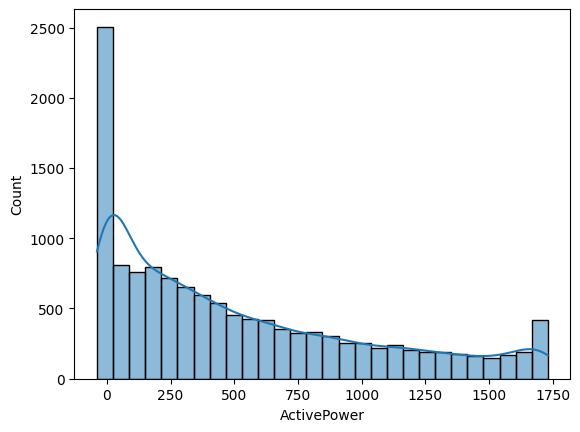

In [ ]:
sns.histplot(data=df_2020, x=df_2020['ActivePower'], kde=True)

In [ ]:
df_2020['ActivePower'].astype(float)

105264    360.361251
105265    550.814483
105266    658.713983
105267    958.625087
105268    743.454246
             ...    
118219     70.044465
118220     40.833474
118221     20.777790
118222     62.091039
118223     68.664425
Name: ActivePower, Length: 12960, dtype: float64

Replacing the Negative values of active power

In [ ]:
df_2020['ActivePower'] = abs(df_2020['ActivePower'])

In [ ]:
df_2020[df_2020['ActivePower'] < 0]

,Date and Time,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed,Time,Date


Handling the null values of Active Power using medain

In [ ]:
df_2020['ActivePower'].median()

357.05479543859656

In [ ]:
df_2020['ActivePower'].fillna(df_2020['ActivePower'].median(),inplace=True)

In [ ]:
df_2020['ActivePower'].isna().sum()

0

In [ ]:
df_2020['ActivePower'].describe()

count    12960.000000
mean       513.292900
std        501.095360
min          0.000000
25%         81.321581
50%        357.054795
75%        822.067884
max       1730.055279
Name: ActivePower, dtype: float64

<Axes: xlabel='ActivePower', ylabel='Count'>

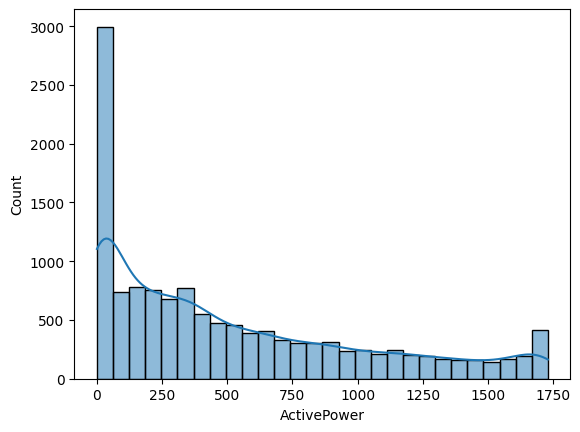

In [ ]:
sns.histplot(data=df_2020, x=df_2020['ActivePower'], kde=True)

<Axes: ylabel='ActivePower'>

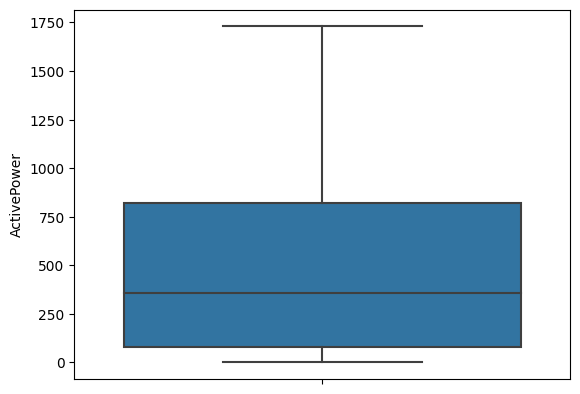

In [ ]:
sns.boxplot(y=df_2020['ActivePower'])

In [ ]:
x={}
for i in range(1,10):
  x[i/10]=(df_2020['ActivePower'].quantile((i/10)))

In [ ]:
df_2020['ActivePower'].describe()

count    12960.000000
mean       513.292900
std        501.095360
min          0.000000
25%         81.321581
50%        357.054795
75%        822.067884
max       1730.055279
Name: ActivePower, dtype: float64

In [ ]:
x

{0.1: 6.041301853209149,
 0.2: 31.333044543266666,
 0.3: 135.37874822105263,
 0.4: 240.50821024561412,
 0.5: 357.05479543859656,
 0.6: 498.0848953222221,
 0.7: 695.7944861929822,
 0.8: 962.6534965263158,
 0.9: 1339.9183586111112}

Analysis on Ambient Temperature

<Axes: xlabel='AmbientTemperatue', ylabel='Count'>

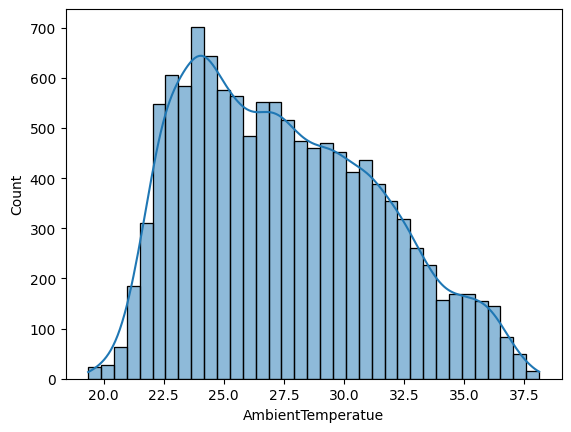

In [ ]:
sns.histplot(df_2020['AmbientTemperatue'],kde=True)

In [ ]:
df_2020['AmbientTemperatue'].describe()

count    12128.000000
mean        27.519926
std          3.995541
min         19.361880
25%         24.172538
50%         27.057801
75%         30.476316
max         38.113558
Name: AmbientTemperatue, dtype: float64

The optimal AmbientTemperature

In [ ]:
df_2020[(df_2020['AmbientTemperatue'] >=10) & (df_2020['AmbientTemperatue']<20)]

,Date and Time,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed,Time,Date
107269,2020-01-14 22:10:00+00:00,328.645069,19.697311,43.701824,-1.030790,-0.430710,-0.430710,0.0,64.292538,56.725499,...,30.680509,185.0,66.723020,9.273462,2.0,G01,185.0,5.537035,22:10:00+00:00,2020-01-14
107270,2020-01-14 22:20:00+00:00,307.528064,19.377085,43.293814,-0.934724,-0.407947,-0.407947,0.0,63.395790,56.312623,...,30.529447,185.0,62.443888,9.236237,2.0,G01,185.0,5.271821,22:20:00+00:00,2020-01-14
107271,2020-01-14 22:30:00+00:00,267.358664,19.361880,42.960391,-0.525762,-0.040401,-0.040401,0.0,62.773811,55.884952,...,30.347676,185.0,53.966327,9.243443,2.0,G01,185.0,5.222000,22:30:00+00:00,2020-01-14
107272,2020-01-14 22:40:00+00:00,301.314634,19.499821,42.650654,-0.786000,-0.187523,-0.187523,0.0,62.438964,55.502487,...,30.143675,191.0,60.534481,9.238915,NaN,G01,191.0,5.572535,22:40:00+00:00,2020-01-14
107273,2020-01-14 22:50:00+00:00,282.517669,19.514578,42.413193,-0.708204,-0.082533,-0.082533,0.0,62.248017,55.241492,...,29.988376,191.0,57.277909,9.236443,2.0,G01,191.0,5.606600,22:50:00+00:00,2020-01-14
107274,2020-01-14 23:00:00+00:00,186.054300,19.772089,42.054956,0.137240,0.676536,0.676536,0.0,61.164146,54.595828,...,29.813057,191.0,37.675837,9.229172,2.0,G01,191.0,4.450672,23:00:00+00:00,2020-01-14
107275,2020-01-14 23:10:00+00:00,77.348487,19.734510,41.813107,1.407198,1.946124,1.946124,0.0,59.528092,53.964454,...,29.640360,NaN,16.145427,9.235442,2.0,G01,NaN,3.614660,23:10:00+00:00,2020-01-14
107276,2020-01-14 23:20:00+00:00,60.822161,19.683492,41.557881,1.643584,2.182220,2.182220,0.0,58.162954,53.201923,...,29.399927,191.0,12.611833,9.242165,2.0,G01,191.0,3.470978,23:20:00+00:00,2020-01-14
107277,2020-01-14 23:30:00+00:00,37.064603,19.715203,41.328154,1.641858,2.180878,2.180878,0.0,57.111055,52.529567,...,29.087500,191.0,7.422441,9.236081,2.0,G01,191.0,3.504200,23:30:00+00:00,2020-01-14
107278,2020-01-14 23:40:00+00:00,0.076392,19.753482,41.090683,1.287718,1.826629,1.826629,0.0,55.827093,51.701360,...,28.839856,191.0,1.762651,9.220212,2.0,G01,191.0,3.173425,23:40:00+00:00,2020-01-14


In [ ]:
df_2020['AmbientTemperatue'].isna().sum()

832

Using interpolate we can fill the missing values of Ambient Temperature

In [ ]:
df_2020['AmbientTemperatue'].interpolate(method='linear', inplace=True)

In [ ]:
df_2020['AmbientTemperatue'].isna().sum()

0

<Axes: xlabel='AmbientTemperatue', ylabel='Count'>

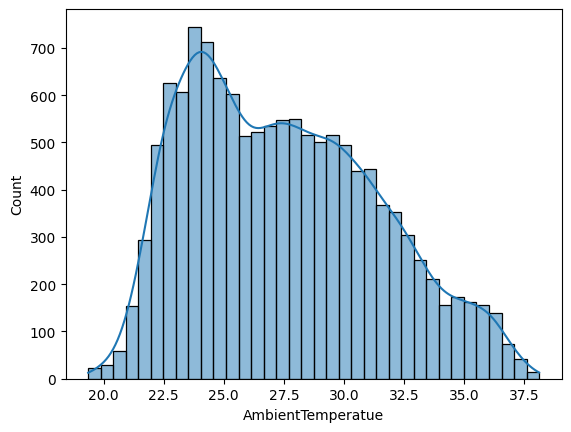

In [ ]:
sns.histplot(df_2020['AmbientTemperatue'],kde=True)

<Axes: ylabel='AmbientTemperatue'>

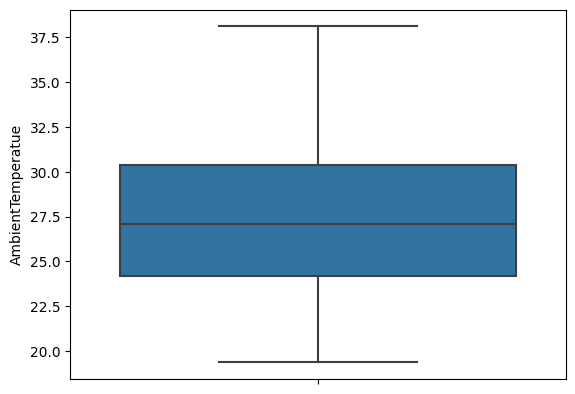

In [ ]:
sns.boxplot(y=df_2020['AmbientTemperatue'])

Anaylsis of Bearing Shaft Temperature

In [ ]:
df_2020['BearingShaftTemperature'].isna().sum()

835

<Axes: xlabel='BearingShaftTemperature', ylabel='Count'>

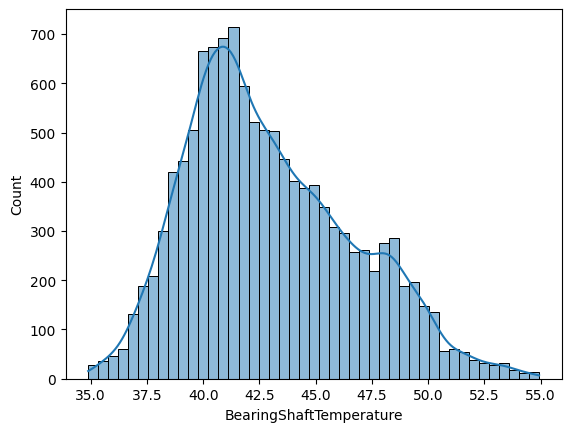

In [ ]:
sns.histplot(df_2020['BearingShaftTemperature'],kde=True)

Handling null values interpolate

In [ ]:
df_2020['BearingShaftTemperature'].interpolate(method='linear', inplace=True)

In [ ]:
df_2020['BearingShaftTemperature'].isna().sum()

0

<Axes: xlabel='BearingShaftTemperature', ylabel='Count'>

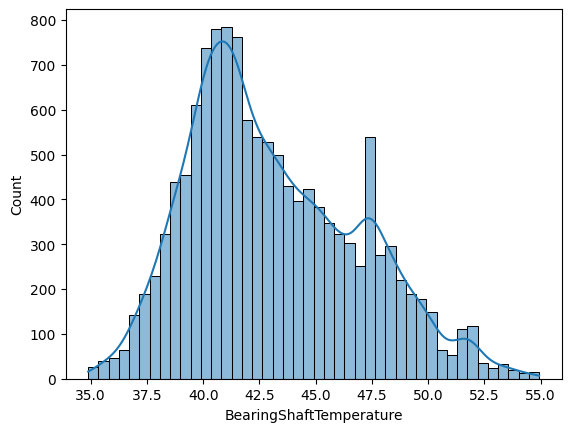

In [ ]:
sns.histplot(df_2020['BearingShaftTemperature'],kde=True)

<Axes: ylabel='BearingShaftTemperature'>

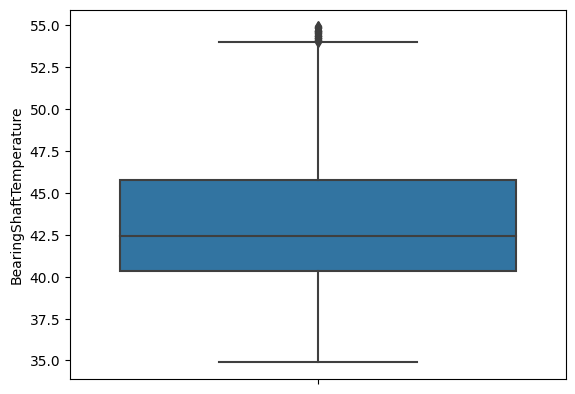

In [ ]:
sns.boxplot(y=df_2020['BearingShaftTemperature'])

Analysis of Blade1PitchAngle                                            Typical pitch angle range: -25° to 90°

<Axes: xlabel='Blade1PitchAngle', ylabel='Count'>

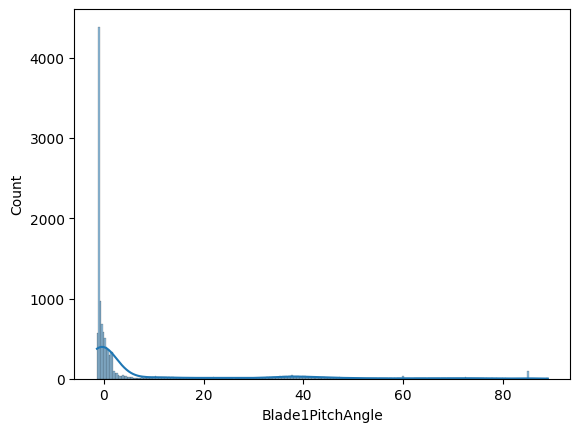

In [ ]:
sns.histplot(df_2020['Blade1PitchAngle'],kde=True)

In [ ]:
df_2020['Blade1PitchAngle'].describe()

count    12754.000000
mean         8.102642
std         18.290535
min         -1.380998
25%         -0.977751
50%         -0.299874
75%          2.503444
max         88.979220
Name: Blade1PitchAngle, dtype: float64

<Axes: ylabel='Blade1PitchAngle'>

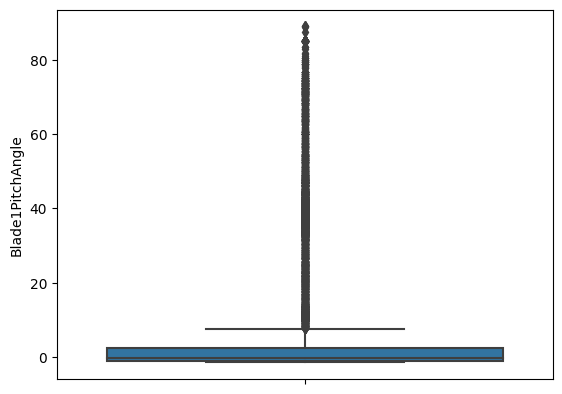

In [ ]:
sns.boxplot(y=df_2020['Blade1PitchAngle'])

In [ ]:
df_2020['Blade1PitchAngle'].quantile(0.90)

38.301563970000004

In [ ]:
df_2020['Blade1PitchAngle'].isna().sum()

206

In [ ]:
df_2020['Blade1PitchAngle'].mode()

0   -1.116754
Name: Blade1PitchAngle, dtype: float64

Null values are handled based on KNN imputer

In [ ]:
column_to_impute = df_2020['Blade1PitchAngle']
missing_values = column_to_impute.isnull()
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(column_to_impute.values.reshape(-1, 1))
column_to_impute.loc[missing_values] = imputed_values[missing_values].ravel()

In [ ]:
df_2020['Blade1PitchAngle'].isna().sum()

0

In [ ]:
df_2020['Blade1PitchAngle'].describe()

count    12960.000000
mean         8.102642
std         18.144577
min         -1.380998
25%         -0.976088
50%         -0.248594
75%          3.406914
max         88.979220
Name: Blade1PitchAngle, dtype: float64

<Axes: xlabel='Blade1PitchAngle', ylabel='Count'>

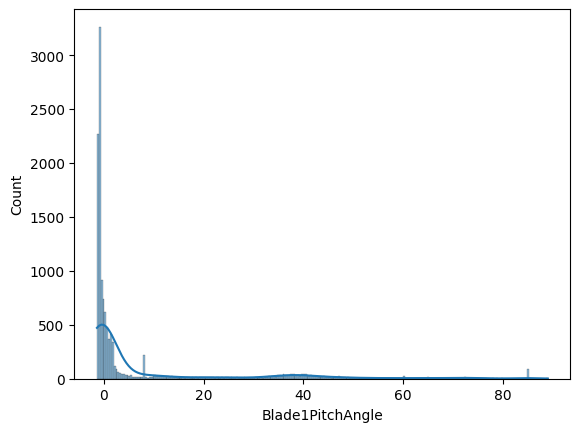

In [ ]:
sns.histplot(df_2020['Blade1PitchAngle'],kde=True)

Analysis of Blade2PitchAngle                                            Typical pitch angle range: -25° to 90°

<Axes: xlabel='Blade2PitchAngle', ylabel='Count'>

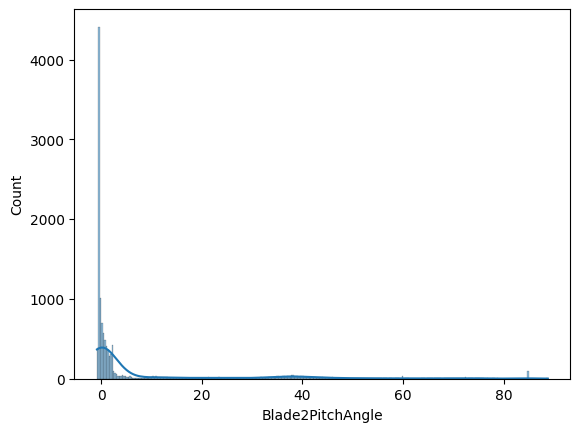

In [ ]:
sns.histplot(df_2020['Blade2PitchAngle'],kde=True)

In [ ]:
df_2020['Blade2PitchAngle'].describe()

count    12686.000000
mean         8.471694
std         17.998606
min         -0.872639
25%         -0.468131
50%          0.223450
75%          2.926315
max         88.797010
Name: Blade2PitchAngle, dtype: float64

<Axes: ylabel='Blade2PitchAngle'>

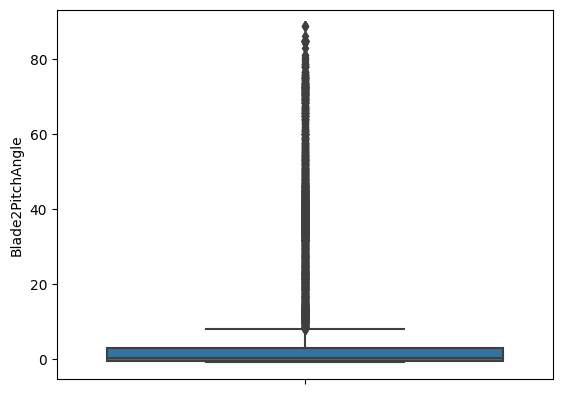

In [ ]:
sns.boxplot(y=df_2020['Blade2PitchAngle'])

In [ ]:
df_2020['Blade2PitchAngle'].quantile(0.90)

37.950753829166665

In [ ]:
df_2020['Blade2PitchAngle'].isna().sum()

274

In [ ]:
df_2020['Blade2PitchAngle'].mode()

0   -0.55167
Name: Blade2PitchAngle, dtype: float64

Null values are handled based on KNN imputer

In [ ]:
column_to_impute = df_2020['Blade2PitchAngle']
missing_values = column_to_impute.isnull()
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(column_to_impute.values.reshape(-1, 1))
column_to_impute.loc[missing_values] = imputed_values[missing_values].ravel()

In [ ]:
df_2020['Blade2PitchAngle'].isna().sum()

0

In [ ]:
df_2020['Blade2PitchAngle'].describe()

count    12960.000000
mean         8.471694
std         17.807312
min         -0.872639
25%         -0.464119
50%          0.279890
75%          4.300398
max         88.797010
Name: Blade2PitchAngle, dtype: float64

<Axes: xlabel='Blade2PitchAngle', ylabel='Count'>

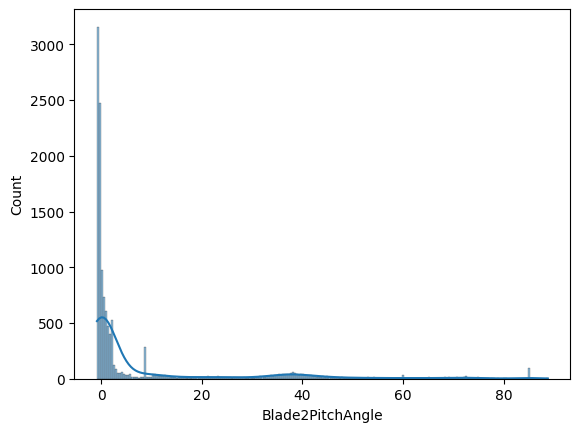

In [ ]:
sns.histplot(df_2020['Blade2PitchAngle'],kde=True)


Analysis of Blade3PitchAngle                                            Typical pitch angle range: -25° to 90°

<Axes: xlabel='Blade3PitchAngle', ylabel='Count'>

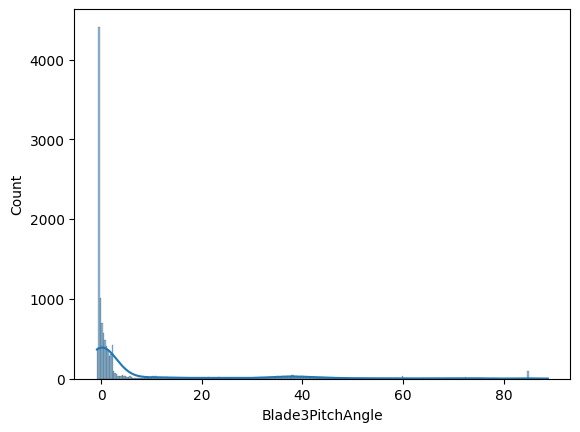

In [ ]:
sns.histplot(df_2020['Blade3PitchAngle'],kde=True)

In [ ]:
df_2020['Blade3PitchAngle'].describe()

count    12686.000000
mean         8.471694
std         17.998606
min         -0.872639
25%         -0.468131
50%          0.223450
75%          2.926315
max         88.797010
Name: Blade3PitchAngle, dtype: float64

<Axes: ylabel='Blade3PitchAngle'>

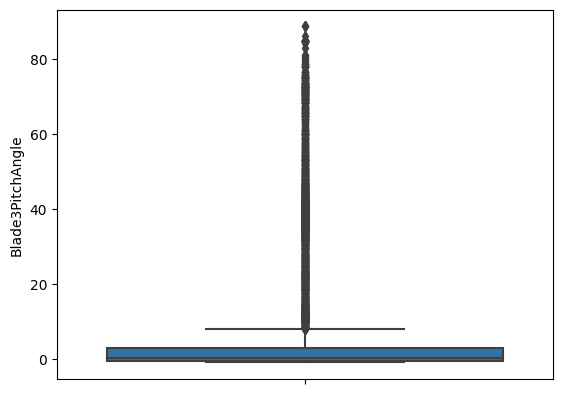

In [ ]:
sns.boxplot(y=df_2020['Blade3PitchAngle'])

In [ ]:
df_2020['Blade3PitchAngle'].quantile(0.90)

37.950753829166665

In [ ]:
df_2020['Blade3PitchAngle'].isna().sum()

274

In [ ]:
df_2020['Blade3PitchAngle'].mode()

0   -0.55167
Name: Blade3PitchAngle, dtype: float64

Null values are handled based on KNN imputer

In [ ]:
column_to_impute = df_2020['Blade3PitchAngle']
missing_values = column_to_impute.isnull()
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(column_to_impute.values.reshape(-1, 1))
column_to_impute.loc[missing_values] = imputed_values[missing_values].ravel()

In [ ]:
df_2020['Blade3PitchAngle'].isna().sum()

0

In [ ]:
df_2020['Blade3PitchAngle'].describe()

count    12960.000000
mean         8.471694
std         17.807312
min         -0.872639
25%         -0.464119
50%          0.279890
75%          4.300398
max         88.797010
Name: Blade3PitchAngle, dtype: float64

<Axes: xlabel='Blade3PitchAngle', ylabel='Count'>

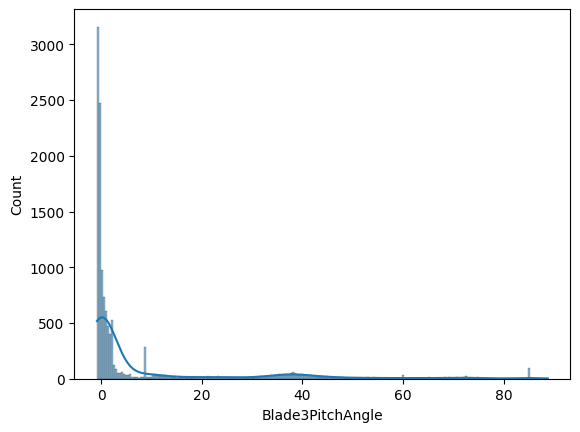

In [ ]:
sns.histplot(df_2020['Blade3PitchAngle'],kde=True)

Analysis of ControlBoxTemperature

In [ ]:
df_2020['ControlBoxTemperature'].value_counts()

0.0    12039
Name: ControlBoxTemperature, dtype: int64

we should remove this column

Analysing the gear box bearing temperature

<Axes: xlabel='GearboxBearingTemperature', ylabel='Count'>

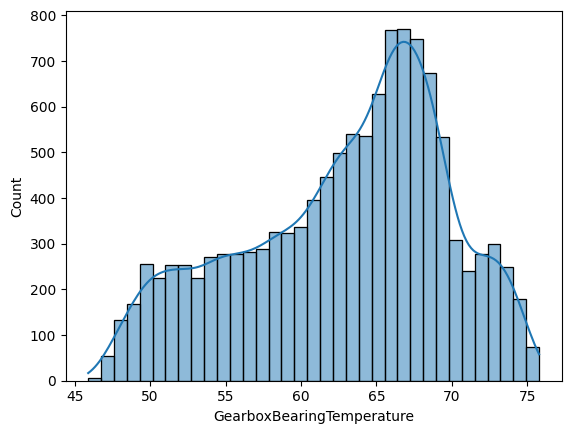

In [ ]:
sns.histplot(df_2020['GearboxBearingTemperature'],kde=True)

<Axes: ylabel='GearboxBearingTemperature'>

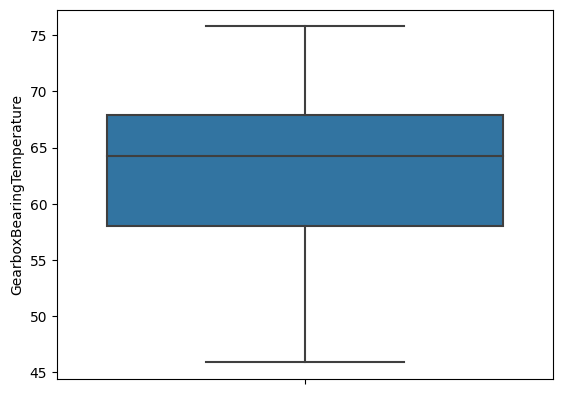

In [ ]:
sns.boxplot(y=df_2020['GearboxBearingTemperature'])

In [ ]:
df_2020['GearboxBearingTemperature'].isna().sum()

835

In [ ]:
df_2020['GearboxBearingTemperature'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['GearboxBearingTemperature'].isna().sum()

0

<Axes: xlabel='GearboxBearingTemperature', ylabel='Count'>

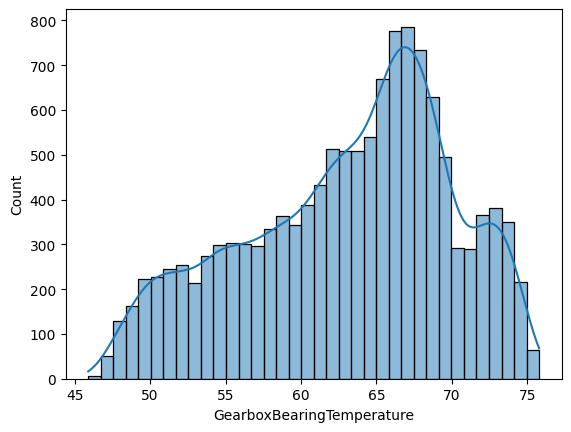

In [ ]:
sns.histplot(df_2020['GearboxBearingTemperature'],kde=True)

In [ ]:
df_2020['GearboxBearingTemperature'].describe()

count    12960.000000
mean        63.086671
std          6.876328
min         45.899790
25%         58.170996
50%         64.346124
75%         68.127205
max         75.777158
Name: GearboxBearingTemperature, dtype: float64

Analysing of GearboxOilTemperature

<Axes: xlabel='GearboxOilTemperature', ylabel='Count'>

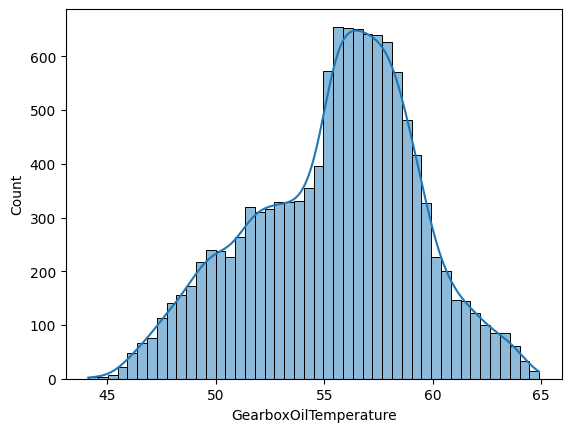

In [ ]:
sns.histplot(df_2020['GearboxOilTemperature'],kde=True)

<Axes: ylabel='GearboxOilTemperature'>

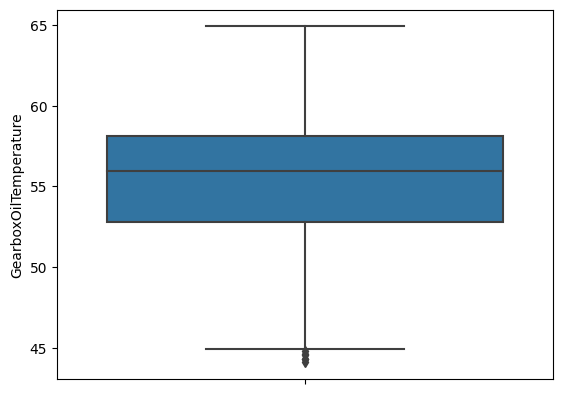

In [ ]:
sns.boxplot(y=df_2020['GearboxOilTemperature'])

In [ ]:
df_2020['GearboxOilTemperature'].isna().sum()

832

In [ ]:
df_2020['GearboxOilTemperature'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['GearboxOilTemperature'].isna().sum()

0

<Axes: xlabel='GearboxOilTemperature', ylabel='Count'>

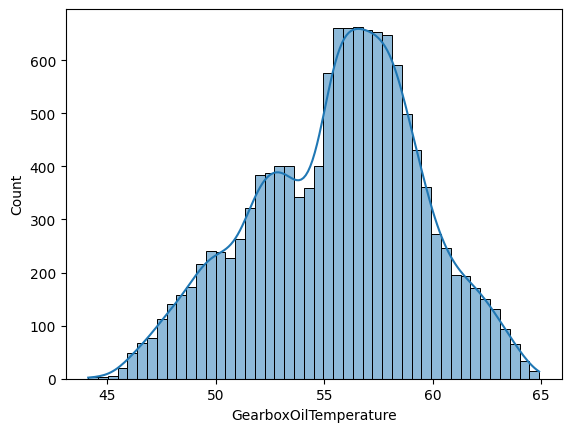

In [ ]:
sns.histplot(df_2020['GearboxOilTemperature'],kde=True)

In [ ]:
df_2020['GearboxOilTemperature'].describe()

count    12960.000000
mean        55.607929
std          3.866086
min         44.111990
25%         52.861662
50%         56.038054
75%         58.280499
max         64.901421
Name: GearboxOilTemperature, dtype: float64

Analysing of GeneratorRPM

<Axes: xlabel='GeneratorRPM', ylabel='Count'>

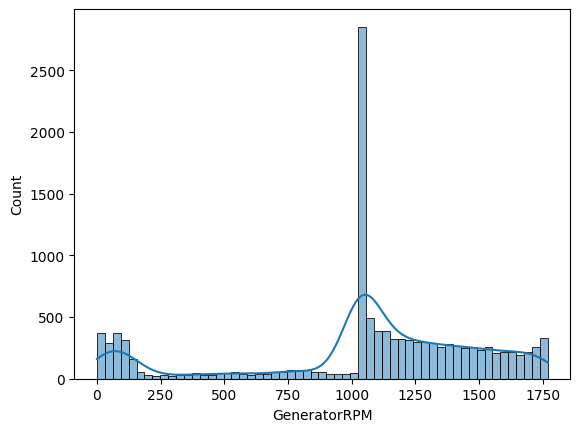

In [ ]:
sns.histplot(df_2020['GeneratorRPM'],kde=True)

<Axes: ylabel='GeneratorRPM'>

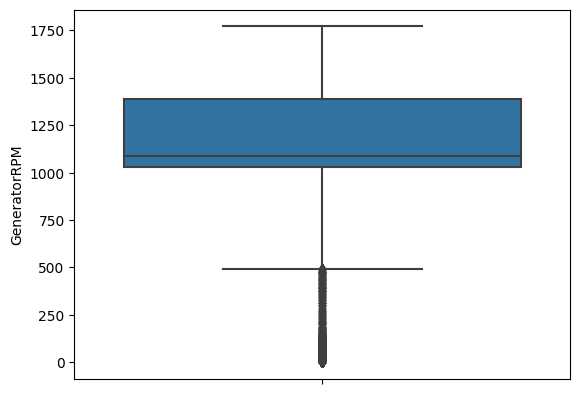

In [ ]:
sns.boxplot(y=df_2020['GeneratorRPM'])

In [ ]:
df_2020['GeneratorRPM'].isna().sum()

833

In [ ]:
df_2020['GeneratorRPM'].describe()

count    12127.000000
mean      1059.862088
std        474.879635
min          0.000000
25%       1029.777528
50%       1088.232640
75%       1387.159609
max       1770.836120
Name: GeneratorRPM, dtype: float64

In [ ]:
df_2020['GeneratorRPM'].quantile(0.12)

143.3111189333333

In [ ]:
df_2020['GeneratorRPM'].fillna(df_2020['GeneratorRPM'].median(),inplace=True)

In [ ]:
df_2020['GeneratorRPM'].isna().sum()

0

<Axes: xlabel='GeneratorRPM', ylabel='Count'>

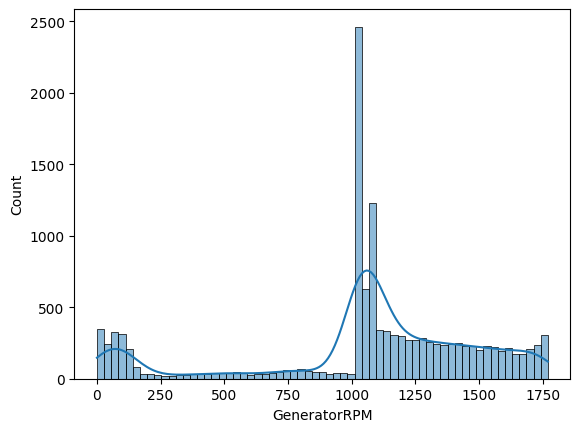

In [ ]:
sns.histplot(df_2020['GeneratorRPM'],kde=True)

Analysing GeneratorWinding1Temperature

<Axes: xlabel='GeneratorWinding1Temperature', ylabel='Count'>

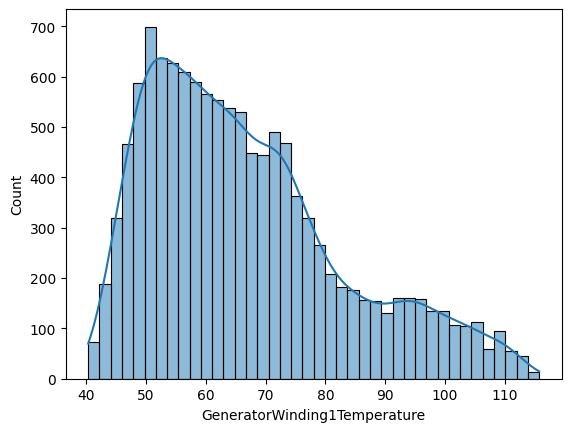

In [ ]:
sns.histplot(df_2020['GeneratorWinding1Temperature'],kde=True)

In [ ]:
df_2020['GeneratorWinding1Temperature'].isna().sum()

832

In [ ]:
df_2020['GeneratorWinding1Temperature'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['GeneratorWinding1Temperature'].interpolate(method='linear')

105264    61.356873
105265    61.761589
105266    62.822387
105267    65.020983
105268    66.147729
            ...    
118219    59.060367
118220    58.452003
118221    58.034071
118222    57.795387
118223    57.694813
Name: GeneratorWinding1Temperature, Length: 12960, dtype: float64

In [ ]:
df_2020['GeneratorWinding1Temperature'].isna().sum()

0

<Axes: xlabel='GeneratorWinding1Temperature', ylabel='Count'>

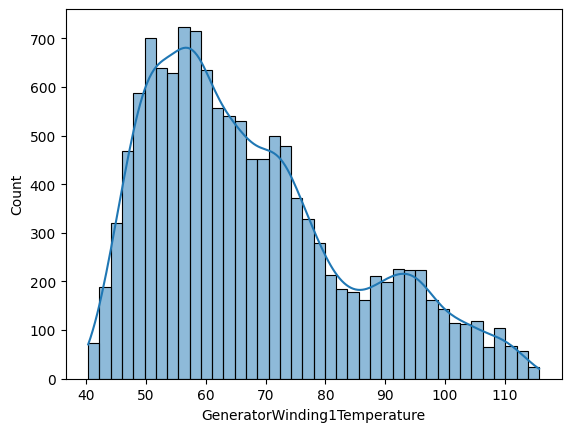

In [ ]:
sns.histplot(df_2020['GeneratorWinding1Temperature'],kde=True)

Analysing GeneratorWinding2Temperature

<Axes: xlabel='GeneratorWinding2Temperature', ylabel='Count'>

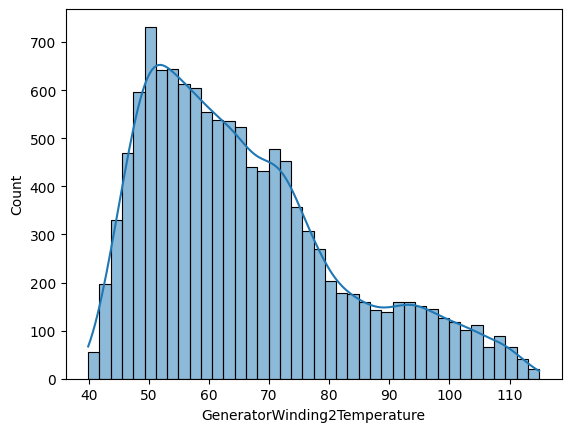

In [ ]:
sns.histplot(df_2020['GeneratorWinding2Temperature'],kde=True)

In [ ]:
df_2020['GeneratorWinding2Temperature'].isna().sum()

832

In [ ]:
df_2020['GeneratorWinding2Temperature'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['GeneratorWinding2Temperature'].isna().sum()

0

<Axes: xlabel='GeneratorWinding2Temperature', ylabel='Count'>

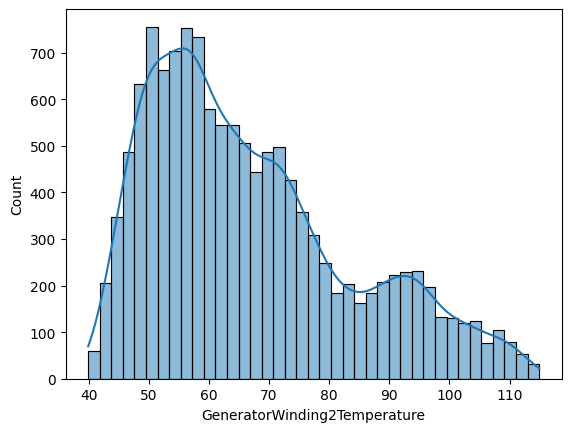

In [ ]:
sns.histplot(df_2020['GeneratorWinding2Temperature'],kde=True)

Analysing HubTemperature

<Axes: xlabel='HubTemperature', ylabel='Count'>

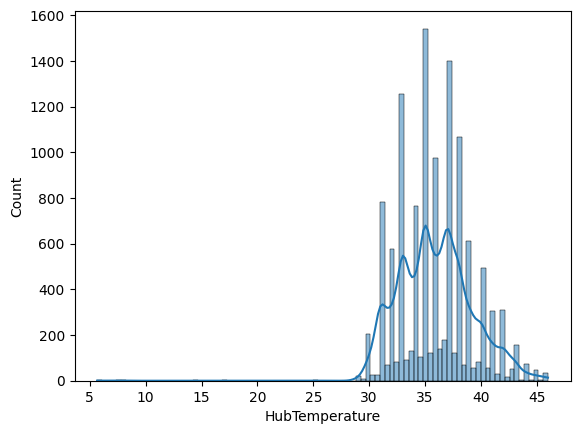

In [ ]:
sns.histplot(df_2020['HubTemperature'],kde=True)

In [ ]:
df_2020['HubTemperature'].isna().sum()

869

In [ ]:
df_2020['HubTemperature'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['HubTemperature'].isna().sum()

0

<Axes: xlabel='HubTemperature', ylabel='Count'>

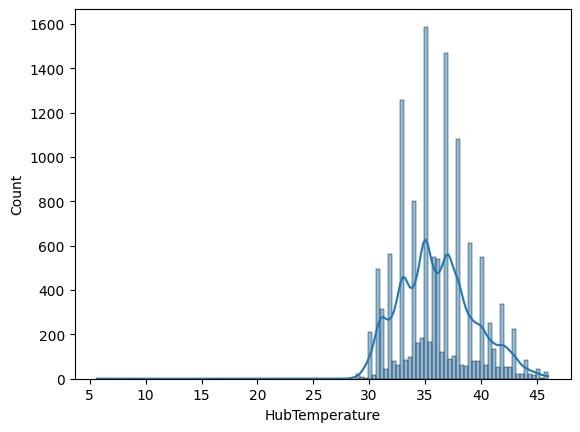

In [ ]:
sns.histplot(df_2020['HubTemperature'],kde=True)

In [ ]:
df_2020['HubTemperature'].describe()

count    12960.000000
mean        36.080683
std          3.330754
min          5.654878
25%         33.801203
50%         35.994715
75%         38.003815
max         45.996185
Name: HubTemperature, dtype: float64

In [ ]:
df_2020['HubTemperature'].quantile(.10)

31.996171513333334

<Axes: ylabel='HubTemperature'>

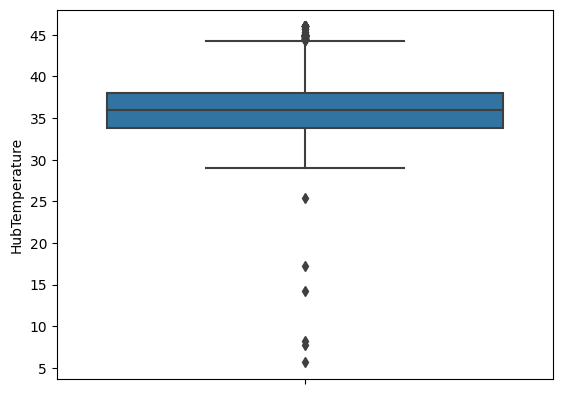

In [ ]:
sns.boxplot(y=df_2020['HubTemperature'])

Analysing MainBoxTemperature

<Axes: xlabel='MainBoxTemperature', ylabel='Count'>

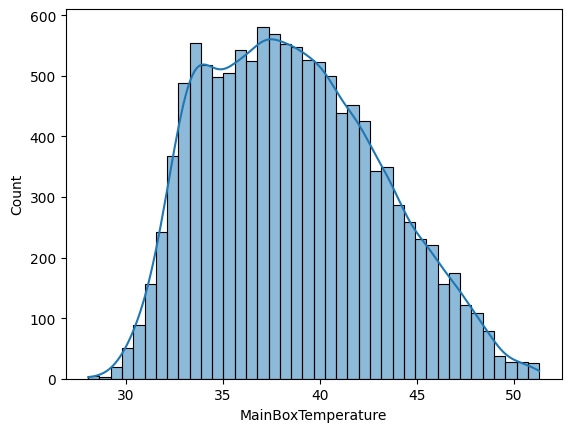

In [ ]:
sns.histplot(df_2020['MainBoxTemperature'],kde=True)

In [ ]:
df_2020['MainBoxTemperature'].isna().sum()

837

In [ ]:
df_2020['MainBoxTemperature'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['MainBoxTemperature'].isna().sum()

0

<Axes: xlabel='MainBoxTemperature', ylabel='Count'>

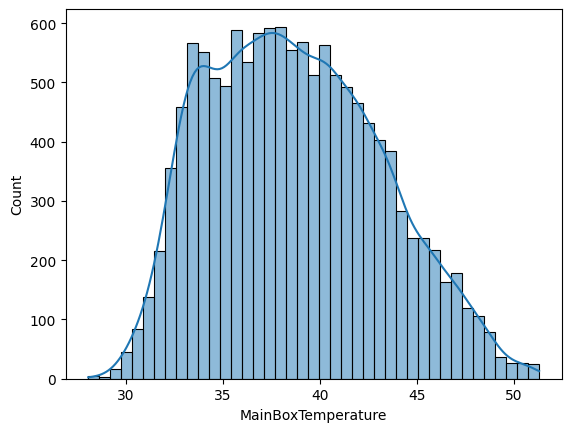

In [ ]:
sns.histplot(df_2020['MainBoxTemperature'],kde=True)

<Axes: ylabel='MainBoxTemperature'>

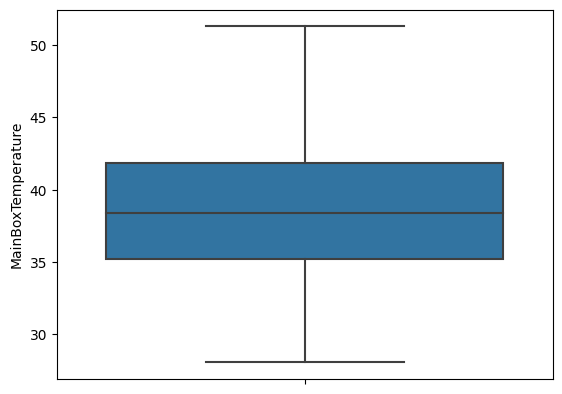

In [ ]:
sns.boxplot(y=df_2020['MainBoxTemperature'])

Analysing NacellePosition

<Axes: xlabel='NacellePosition', ylabel='Count'>

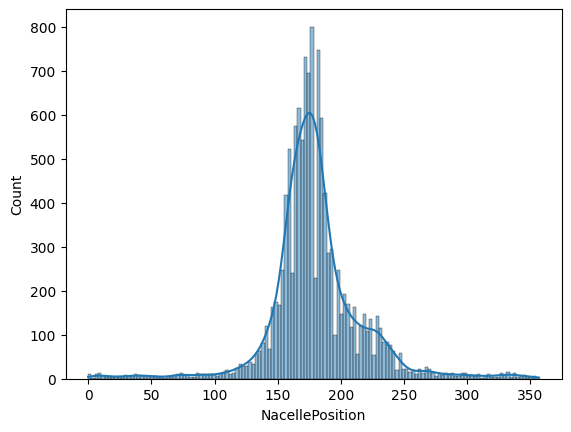

In [ ]:
sns.histplot(df_2020['NacellePosition'],kde=True)

In [ ]:
df_2020['NacellePosition'].isna().sum()

730

In [ ]:
df_2020['NacellePosition'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['NacellePosition'].isna().sum()

0

<Axes: xlabel='NacellePosition', ylabel='Count'>

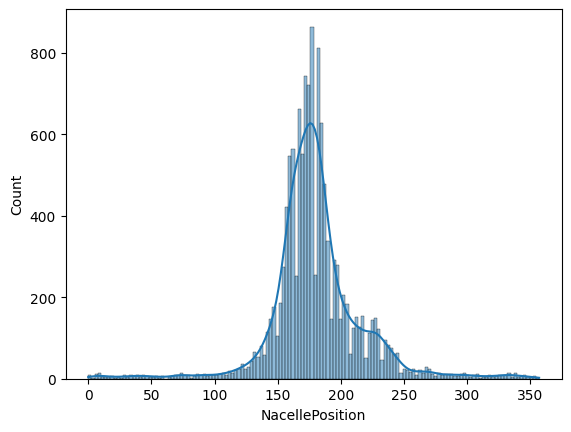

In [ ]:
sns.histplot(df_2020['NacellePosition'],kde=True)

<Axes: ylabel='NacellePosition'>

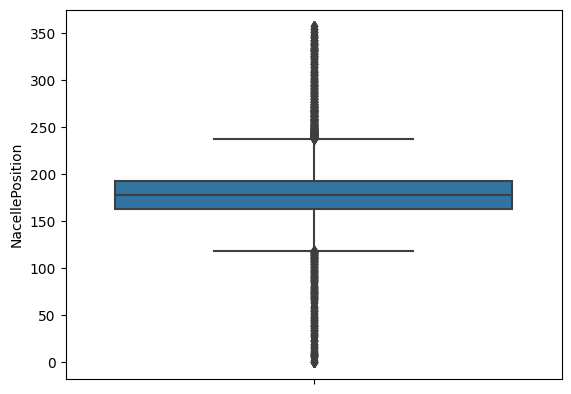

In [ ]:
sns.boxplot(y=df_2020['NacellePosition'])

Analysing ReactivePower

<Axes: xlabel='ReactivePower', ylabel='Count'>

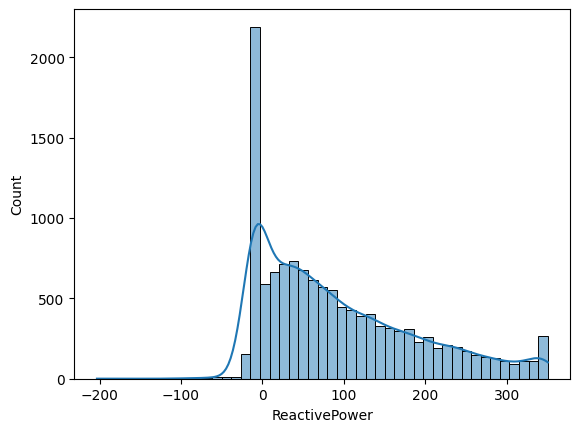

In [ ]:
sns.histplot(df_2020['ReactivePower'],kde=True)

In [ ]:
df_2020['ReactivePower'].describe()

count    12782.000000
mean        93.915557
std         97.471168
min       -203.182591
25%         13.058039
50%         68.221804
75%        153.225537
max        350.661592
Name: ReactivePower, dtype: float64

In [ ]:
df_2020['ReactivePower'].isna().sum()

178

In [ ]:
df_2020['ReactivePower'].fillna(df_2020['ReactivePower'].mean(),inplace=True)

In [ ]:
df_2020['ReactivePower'].isna().sum()

0

<Axes: xlabel='ReactivePower', ylabel='Count'>

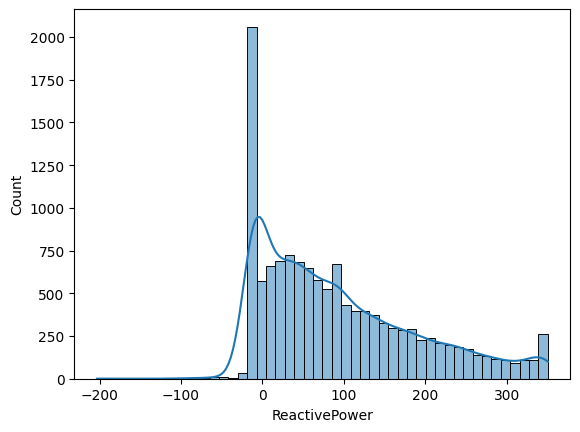

In [ ]:
sns.histplot(df_2020['ReactivePower'],kde=True)

Anaylsing RotorRPM

<Axes: xlabel='RotorRPM', ylabel='Count'>

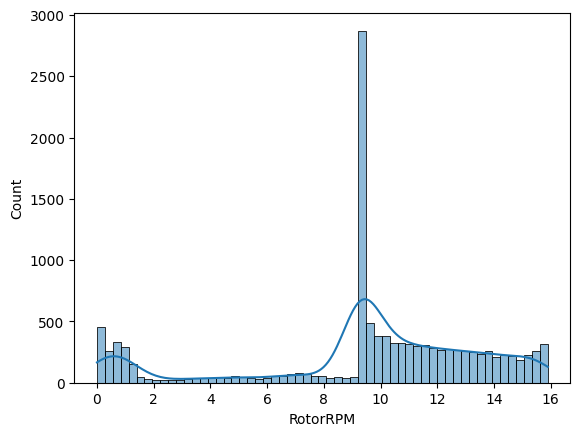

In [ ]:
sns.histplot(df_2020['RotorRPM'],kde=True)

In [ ]:
df_2020['RotorRPM'].isna().sum()

842

In [ ]:
df_2020['RotorRPM'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['RotorRPM'].isna().sum()

0

<Axes: xlabel='RotorRPM', ylabel='Count'>

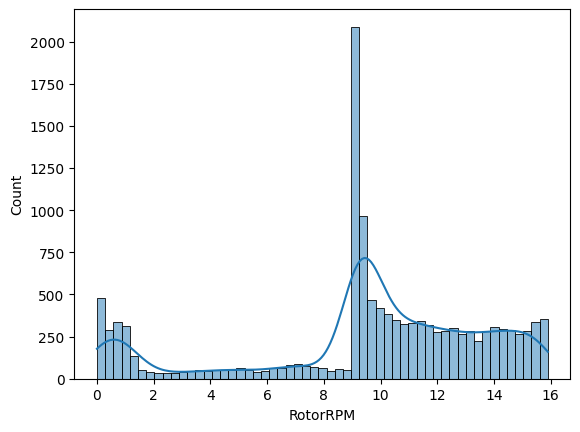

In [ ]:
sns.histplot(df_2020['RotorRPM'],kde=True)

<Axes: ylabel='RotorRPM'>

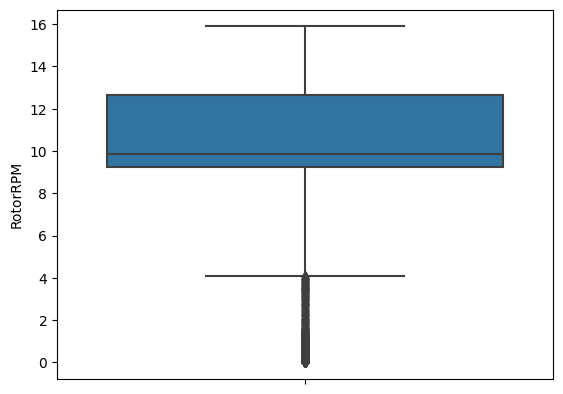

In [ ]:
sns.boxplot(y=df_2020['RotorRPM'])

In [ ]:
df_2020['RotorRPM'].quantile(0.12)

1.4563972268476348

Analysing TurbineStatus

In [ ]:
df_2020['TurbineStatus'].describe()

count    1.261900e+04
mean     5.275167e+03
std      5.852755e+05
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      6.574653e+07
Name: TurbineStatus, dtype: float64

In [ ]:
df_2020['TurbineStatus'].isna().sum()

341

In [ ]:
df_2020['TurbineStatus'].fillna(df_2020['TurbineStatus'].median(),inplace=True)

In [ ]:
df_2020['TurbineStatus'].describe()

count    1.296000e+04
mean     5.136421e+03
std      5.775243e+05
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      6.574653e+07
Name: TurbineStatus, dtype: float64

Analysing WTG

In [ ]:
df_2020['WTG'].unique()

array(['G01'], dtype=object)

In [ ]:
df_2020['WTG'].value_counts()

G01    12960
Name: WTG, dtype: int64

In [ ]:
df_2020['WTG'].isna().sum()

0

Analysing WindSpeed

<Axes: xlabel='WindSpeed', ylabel='Count'>

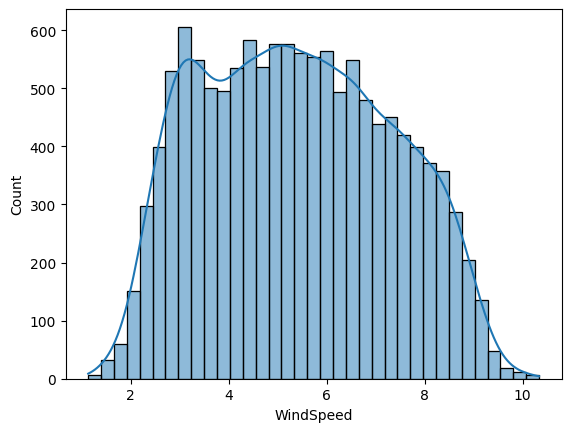

In [ ]:
sns.histplot(df_2020['WindSpeed'],kde=True)

In [ ]:
df_2020['WindSpeed'].isna().sum()

178

In [ ]:
df_2020['WindSpeed'].interpolate(method='linear',inplace=True)

In [ ]:
df_2020['WindSpeed'].isna().sum()

0

<Axes: xlabel='WindSpeed', ylabel='Count'>

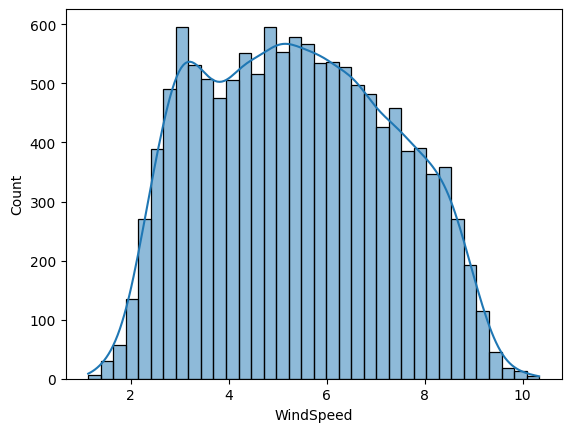

In [ ]:
sns.histplot(df_2020['WindSpeed'],kde=True)

Handling the outliers

In [ ]:
df_2020.isna().sum()

Date and Time                     0
ActivePower                       0
AmbientTemperatue                 0
BearingShaftTemperature           0
Blade1PitchAngle                  0
Blade2PitchAngle                  0
Blade3PitchAngle                  0
ControlBoxTemperature           921
GearboxBearingTemperature         0
GearboxOilTemperature             0
GeneratorRPM                      0
GeneratorWinding1Temperature      0
GeneratorWinding2Temperature      0
HubTemperature                    0
MainBoxTemperature                0
NacellePosition                   0
ReactivePower                     0
RotorRPM                          0
TurbineStatus                     0
WTG                               0
WindDirection                   730
WindSpeed                         0
Time                              0
Date                              0
dtype: int64

In [ ]:
Z_score = ['NacellePosition']
Percentile = ['BearingShaftTemperature','GearboxBearingTemperature','GearboxOilTemperature']
Percentile_12_per = ['GeneratorRPM','RotorRPM']
Quantile   = ['AmbientTemperatue','GeneratorWinding1Temperature','GeneratorWinding2Temperature','WindSpeed']

In [ ]:
for i in Z_score:
  mean=df_2020[i].mean()
  std=df_2020[i].std()
  z_score =(df_2020[i] - mean )/std
  min_limit = mean-3*std
  max_limit = mean+3*std
  df_2020[i] = np.where(df_2020[i]>max_limit,max_limit,np.where(df_2020[i]<min_limit,min_limit,df_2020[i]))

In [ ]:
for i in Percentile:
  min_limit = df_2020[i].quantile(0.01)
  max_limit = df_2020[i].quantile(0.99)
  df_2020[i] = np.where(df_2020[i]>max_limit,max_limit,np.where(df_2020[i]<min_limit,min_limit,df_2020[i]))

In [ ]:
for i in Percentile_12_per:
  min_limit = df_2020[i].quantile(0.12)
  df_2020[i] = np.where(df_2020[i]<min_limit,min_limit,df_2020[i])

In [ ]:
for i in Quantile:
  q1 = df_2020[i].quantile(0.25)
  q3 = df_2020[i].quantile(0.75)
  IQR = q3-q1
  min_limit = q1- 1.5*IQR
  max_limit = q3 + 1.5*IQR
  df_2020[i] = np.where(df_2020[i]>max_limit,max_limit,np.where(df_2020[i]<min_limit,min_limit,df_2020[i]))

In [ ]:
df_2020['WindDirection'].describe()

count    12230.000000
mean       180.108005
std         37.838300
min          0.000000
25%        163.000000
50%        176.800000
75%        193.000000
max        357.000000
Name: WindDirection, dtype: float64

In [ ]:
len(df_2020[df_2020['NacellePosition'] == df_2020['WindDirection']])

11877

Handling null values of 2019 dataset

In [ ]:
df_2019.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,46569.000000,46286.000000,46342.000000,29242.000000,29205.000000,29205.000000,46080.0,46364.000000,46281.000000,46164.000000,46270.000000,46292.000000,46265.000000,46332.000000,33098.000000,46566.000000,46016.000000,4.624000e+04,33098.000000,46676.000000
mean,637.013621,29.258582,43.010302,10.467985,10.716267,10.716267,0.0,64.392164,58.031286,1094.210224,73.300288,72.671573,37.270215,39.960031,208.305260,125.716244,9.842667,1.650879e+03,208.305260,5.977683
std,622.828114,4.589262,5.782192,21.552324,21.145780,21.145780,0.0,11.105992,6.824994,541.608296,23.615347,23.637497,5.448868,5.914052,95.799462,128.360266,4.836612,2.854334e+05,95.799462,2.697732
min,-38.312299,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.916426,0.000000,0.000000e+00,0.000000,0.900000
25%,78.261511,26.069166,39.765410,-0.877326,-0.390210,-0.390210,0.0,57.587498,54.135176,1029.743857,55.802124,55.067130,33.996185,36.218747,157.656250,12.286353,9.230248,2.000000e+00,157.656250,3.858175
50%,416.272165,28.690383,43.083921,0.870031,1.333677,1.333677,0.0,64.724405,57.528509,1117.575775,65.937123,65.149516,37.993207,39.911747,185.600000,82.243712,10.038953,2.000000e+00,185.600000,5.652666
75%,1142.090988,32.295262,47.210947,8.868467,9.182641,9.182641,0.0,72.145107,62.725472,1529.018883,87.950647,87.442996,41.003815,43.943430,312.500000,230.001287,13.722970,2.000000e+00,312.500000,7.698688
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.137673e+07,357.000000,22.970893


In [ ]:
df_2019_2020 = pd.concat([df_2019,df_2020],axis=0)

In [ ]:
df_2019.isna().sum()

Date and Time                       0
ActivePower                      5991
AmbientTemperatue                6274
BearingShaftTemperature          6218
Blade1PitchAngle                23318
Blade2PitchAngle                23355
Blade3PitchAngle                23355
ControlBoxTemperature            6480
GearboxBearingTemperature        6196
GearboxOilTemperature            6279
GeneratorRPM                     6396
GeneratorWinding1Temperature     6290
GeneratorWinding2Temperature     6268
HubTemperature                   6295
MainBoxTemperature               6228
NacellePosition                 19462
ReactivePower                    5994
RotorRPM                         6544
TurbineStatus                    6320
WTG                                 0
WindDirection                   19462
WindSpeed                        5884
Time                                0
Date                                0
dtype: int64

In [ ]:
df_mice = df_2019_2020.copy()
numeric_cols = df_mice.select_dtypes(include='number').columns
non_numeric_cols = df_mice.select_dtypes(exclude='number').columns
mice_imputer = IterativeImputer(estimator=LinearRegression(), n_nearest_features=None, imputation_order='descending')
df_mice_imputed_numeric = pd.DataFrame(mice_imputer.fit_transform(df_mice[numeric_cols]), columns=numeric_cols, index=df_mice.index)
df_final = pd.concat([df_mice_imputed_numeric, df_mice[non_numeric_cols]], axis=1)

In [ ]:
df_final.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.0,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,6.552000e+04,65520.000000,65520.000000
mean,610.163060,28.859015,43.032237,9.686173,10.026366,10.026366,0.0,64.109257,57.494096,1089.919053,72.064338,71.422641,37.012220,39.690392,200.444525,118.880330,9.783786,2.413930e+03,200.410013,5.856499
std,572.722049,4.312405,5.141366,16.598531,16.208532,16.208532,0.0,9.843064,6.078538,493.439955,21.365273,21.377717,4.843099,5.376272,70.519823,117.257110,4.471186,3.513821e+05,70.861246,2.442513
min,-38.312299,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,-257.940949,0.000000,0.000000,-9.959905,0.000000,0.000000,-203.182591,-1.071094,0.000000e+00,0.000000,0.900000
25%,107.991897,25.910422,40.180428,-0.445523,0.069231,0.069231,0.0,58.630731,54.254952,1029.903767,56.460812,55.743866,34.016111,36.363673,170.800000,18.685559,9.232425,2.000000e+00,170.800000,4.037966
50%,484.388496,28.859015,43.032237,7.518957,10.026366,10.026366,0.0,64.109257,57.494096,1089.919053,67.958368,67.198292,37.012220,39.690392,200.408621,94.924518,9.783786,2.000000e+00,200.101360,5.856499
75%,951.768863,31.438319,46.355447,9.686173,10.026366,10.026366,0.0,69.725072,60.403249,1435.032012,80.837924,80.263781,40.003815,43.006507,200.614146,187.080103,12.992617,2.000000e+00,200.666595,7.264093
max,1779.032433,67.063874,55.088655,90.413394,90.017830,90.017830,0.0,82.237932,90.334802,1893.649687,126.773031,126.043018,50.467302,57.478548,357.000000,403.713620,19.807699,6.574653e+07,357.000000,22.970893


In [ ]:
df_final.shape

(65520, 24)

In [ ]:
df_final.duplicated().sum()

0

In [ ]:
df_final.isna().sum()

ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
ControlBoxTemperature           0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
Date and Time                   0
WTG                             0
Time                            0
Date                            0
dtype: int64

In [ ]:
df_2019_2020 = df_final.copy()

In [ ]:
df_2019_2020.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.0,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,65520.000000,6.552000e+04,65520.000000,65520.000000
mean,610.163060,28.859015,43.032237,9.686173,10.026366,10.026366,0.0,64.109257,57.494096,1089.919053,72.064338,71.422641,37.012220,39.690392,200.444525,118.880330,9.783786,2.413930e+03,200.410013,5.856499
std,572.722049,4.312405,5.141366,16.598531,16.208532,16.208532,0.0,9.843064,6.078538,493.439955,21.365273,21.377717,4.843099,5.376272,70.519823,117.257110,4.471186,3.513821e+05,70.861246,2.442513
min,-38.312299,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,-257.940949,0.000000,0.000000,-9.959905,0.000000,0.000000,-203.182591,-1.071094,0.000000e+00,0.000000,0.900000
25%,107.991897,25.910422,40.180428,-0.445523,0.069231,0.069231,0.0,58.630731,54.254952,1029.903767,56.460812,55.743866,34.016111,36.363673,170.800000,18.685559,9.232425,2.000000e+00,170.800000,4.037966
50%,484.388496,28.859015,43.032237,7.518957,10.026366,10.026366,0.0,64.109257,57.494096,1089.919053,67.958368,67.198292,37.012220,39.690392,200.408621,94.924518,9.783786,2.000000e+00,200.101360,5.856499
75%,951.768863,31.438319,46.355447,9.686173,10.026366,10.026366,0.0,69.725072,60.403249,1435.032012,80.837924,80.263781,40.003815,43.006507,200.614146,187.080103,12.992617,2.000000e+00,200.666595,7.264093
max,1779.032433,67.063874,55.088655,90.413394,90.017830,90.017830,0.0,82.237932,90.334802,1893.649687,126.773031,126.043018,50.467302,57.478548,357.000000,403.713620,19.807699,6.574653e+07,357.000000,22.970893


Detecting the outlier of 2019 dataset and combines with 2020 dataset

In [ ]:
df_2019_new = df_2019_2020[df_2019_2020['Date'].str.contains('2019')]
df_2020_new = df_2019_2020[df_2019_2020['Date'].str.contains('2020')]

In [ ]:
df_2019_new.shape

(52560, 24)

In [ ]:
df_2020_new.shape

(12960, 24)

In [ ]:
df_2019_new.to_csv('/content/df_2019_new.csv',index=False)

In [ ]:
df_2019_preprocessed = pd.read_csv('df_2019.csv')

In [ ]:
df_2019_preprocessed.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.0,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,5.256000e+04,52560.000000,52560.000000
mean,634.057211,29.192591,43.103030,10.076251,10.408130,10.408130,0.0,64.632713,58.144008,1093.324498,73.199219,72.562860,37.385449,40.035922,205.402112,125.036028,9.806288,1.742631e+03,205.365158,5.951738
std,586.588092,4.325987,4.858672,16.154943,15.751370,15.751370,0.0,9.420553,5.793713,508.079687,22.120290,22.131293,4.424433,5.040719,76.115272,120.986092,4.557317,2.677230e+05,76.117818,2.488679
min,-8.589952,16.186189,26.274643,-1.166264,-0.654290,-0.654290,0.0,40.855610,44.377729,0.000000,32.109226,32.191718,25.819766,26.948700,0.000000,-33.916426,0.000000,0.000000e+00,0.000000,0.900000
25%,115.784272,26.383010,40.133863,0.303283,0.817610,0.817610,0.0,58.771206,54.700765,1029.913872,57.126511,56.403534,34.662053,36.777778,175.000000,20.116881,9.233150,2.000000e+00,175.000000,4.104443
50%,534.242393,28.859015,43.032237,7.990457,10.026366,10.026366,0.0,64.109257,57.494096,1089.919053,69.233441,68.504790,37.012220,39.690392,200.444525,106.458347,9.783786,2.000000e+00,200.410013,5.856499
75%,1002.624624,31.759304,46.520614,9.686173,10.026366,10.026366,0.0,70.714936,61.582788,1461.856530,82.459768,81.896937,40.684840,43.330496,204.200000,202.440376,13.109072,2.000000e+00,204.200000,7.388697
max,1779.032433,42.197266,52.206687,88.719590,88.548225,88.548225,0.0,82.237932,71.905823,1893.649687,122.840580,122.175441,50.467302,53.159574,357.000000,403.713620,19.807699,6.137673e+07,357.000000,13.349905


In [ ]:
df_2020_new.shape

(12960, 24)

In [ ]:
df_2020_2019_preprocessed = pd.concat([df_2019_preprocessed,df_2020_new],axis=0)

In [ ]:
df_2020_2019_preprocessed.shape

(65520, 24)

In [ ]:
df_2020_2019_preprocessed.to_csv('/content/turbine-preprocessed.csv',index=False)

<Axes: ylabel='RotorRPM'>

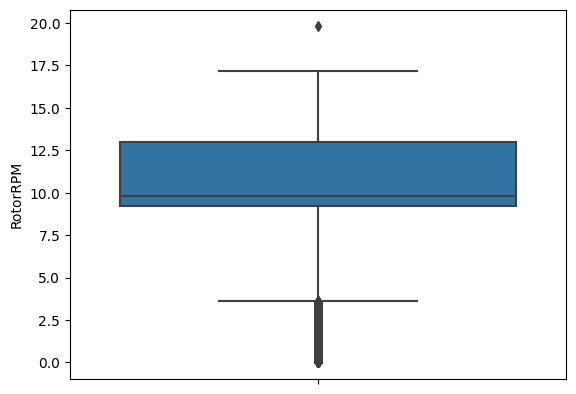

In [ ]:
sns.boxplot(y=df_2020_2019_preprocessed['RotorRPM'])